## Load example data

Make sure to first apply a linear transformation by using a tool such as [SIFT](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html).

In [1]:
import mirage
image = mirage.tl.get_data("sample2_image.tiff")
reference = mirage.tl.get_data("sample2_reference.tiff")

[ WARN:0@2.921] global grfmt_tiff.cpp:714 readData OpenCV TIFF: TIFFRGBAImageOK: Sorry, can not handle images with 64-bit samples
[ WARN:0@2.931] global grfmt_tiff.cpp:714 readData OpenCV TIFF: TIFFRGBAImageOK: Sorry, can not handle images with 64-bit samples


## Plot data

Only plot a window using the `mesh` concept.

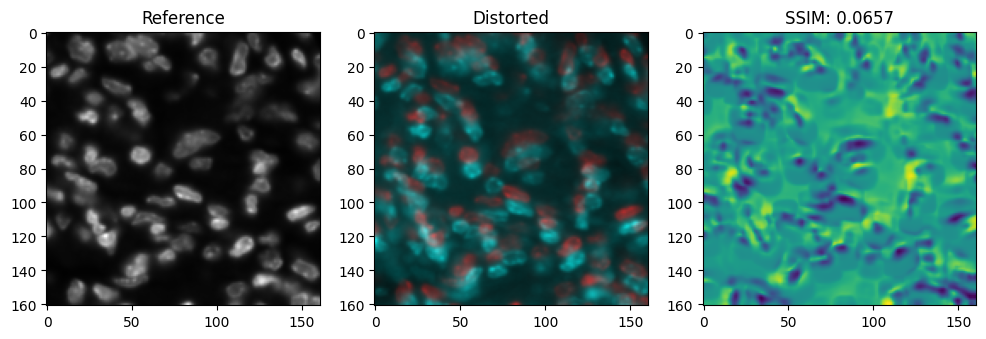

In [2]:
mesh = mirage.tl.Mesh(x=150, y=150, pad=80)
mirage.pl.plot_ssim(reference, image, mesh=mesh)

## Train model to align images


We see that the reference and the image are not overlaying well. Use mirage to align. In this example we use a small model.

In [3]:
# Build model
mirage_model = mirage.MIRAGE(
    images=image,
    references=reference,
    pad=24,
    offset=24,
    num_neurons=126,  # more for larger images
    num_layers=2,  # more for larger images
    pool=1, 
    loss="SSIM"
)

# Train model
mirage_model.train(batch_size=64, num_steps=128, lr__sched=True, LR=0.005)

-0.44342: 100%|██████████| 128/128 [00:11<00:00, 11.00it/s]


0

## Apply model to image

The same model can be used to align other images as well.

In [4]:
# Pre-compute transformation (increase num_cut for larger images to avoid reaching memory limit)
mirage_model.compute_transform(num_cut=1)

# Transform
image_aligned = mirage_model.apply_transform(image)

## Inspect result

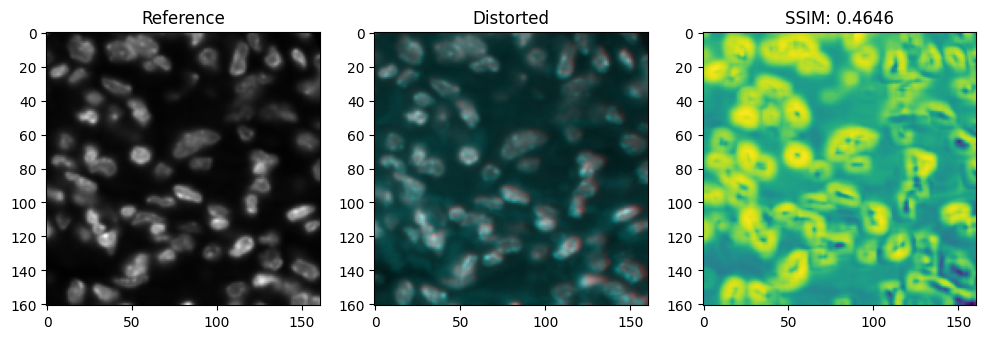

In [5]:
mirage.pl.plot_ssim(reference, image_aligned, mesh=mesh)

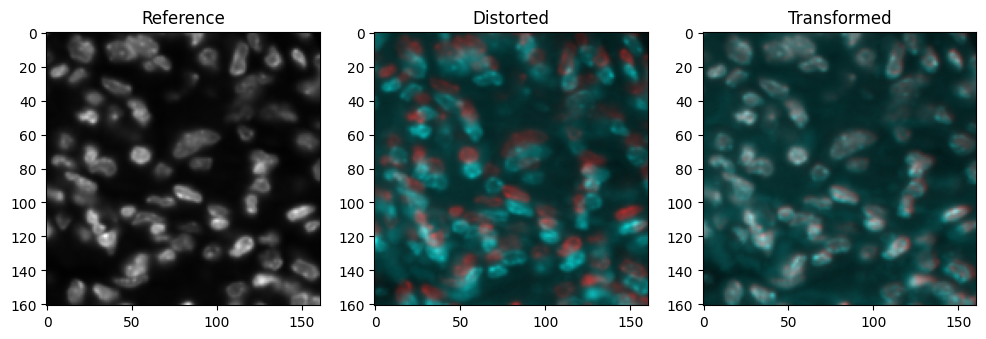

In [6]:
mirage.pl.plot_before_after(reference, image, image_aligned, mesh=mesh)